In [ ]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Ejemplo : Conteo de Fotones
Se quiere saber el flujo de una estrella contando los fotones, pero antes se hacen las siguientes suposiciones: <br>
- Flujo constante en el tiempo
- Se ignora el ruido presente en las mediciones.
- Hicimos $N$ medidas con nuestro telescopio, obteniendo observaciones $F_i$ de el flujo de fotones con un error $e_i$
- Asumimos que los errores $e_i$ se distribuyen normalmente.

Dado que tenemos entonces los datos $D = (F_i, e_i)$, queremos estimar el valor de $F_{true}$

##  🔭 Observaciones 
Debido a que lo que queremos es contar, una buena distribución para hacer la simulación es Poisson.

ver: [Scipy - Poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

In [ ]:
# Generamos datos de conteo de fotones
np.random.seed(1)  # Reprodubilicidad

F_true = 1000  # Flujo verdadero (n fotones/tiempo)
N = 50 # Cantidad de observaciones
F = stats.poisson.rvs(mu = F_true, size = N)  # Observaciones
e = np.sqrt(F)  # Errores (Poisson)

In [ ]:
F,e 

(array([ 992,  962,  968,  991,  993,  970,  992,  961,  983, 1042,  947,
         966,  951, 1079, 1018, 1017,  979,  953, 1050,  980,  971,  999,
        1007, 1008,  953, 1018,  928, 1015, 1067, 1049,  961,  991, 1058,
        1024, 1044, 1024,  978,  993, 1015,  956,  995,  992, 1049,  984,
        1044, 1050,  966, 1060,  939, 1020]),
 array([31.4960315 , 31.01612484, 31.11269837, 31.48015248, 31.51190251,
        31.144823  , 31.4960315 , 31.        , 31.35283081, 32.28002478,
        30.77336511, 31.08054054, 30.83828789, 32.84813541, 31.90611227,
        31.89043744, 31.28897569, 30.87069808, 32.40370349, 31.30495168,
        31.1608729 , 31.60696126, 31.73326331, 31.74901573, 30.87069808,
        31.90611227, 30.46309242, 31.85906464, 32.66496594, 32.38826948,
        31.        , 31.48015248, 32.52691193, 32.        , 32.31098884,
        32.        , 31.27299154, 31.51190251, 31.85906464, 30.91924967,
        31.54362059, 31.4960315 , 32.38826948, 31.36877428, 32.31098884,
 

Visualizamos las observaciones

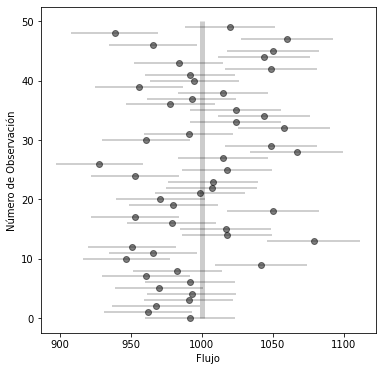

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
ax.errorbar(F, np.arange(N), xerr=e, fmt='ok', ecolor='gray', alpha=0.5)
ax.vlines([F_true], 0, N, linewidth=5, alpha=0.2)
ax.set_xlabel("Flujo");ax.set_ylabel("Número de Observación");

**Propondremos un modelo Gaussiano para $F_{\rm true}$**

**Dadas las observaciones,  Cual es el mejor valor estimado para el flujo $F_{true}$**

## Enfoque Frecuentista
Un enfoque clásico frecuentista es obtener el estimador de máxima verosimilitud, o sea, dada una observación $D_i$, podemos calcular la probabilidad de hacer esa observación dado que existe un valor de flujo constante $F_{true}$, dado el supuesto de errores que se distribuyen iid normal tenemos.

\begin{equation}
  P(D_i~|~F_{\rm true}) = \frac{1}{\sqrt{2\pi e_i^2}} \exp{\left[\frac{-(F_i - F_{\rm true})^2}{2 e_i^2}\right]}
\end{equation}

Que es una distribución normal de media $F_{true}$ y desviación estándar $e_i$. Luego se quuere calcular la probabilidad de los sucesos independientes:

\begin{equation}
\mathcal{L}(D~|~F_{\rm true}) = \prod_{i=1}^N P(D_i~|~F_{\rm true})
\end{equation}

Y para facilidad de la optimización, se utiliza las propiedades del logaritmo para tener una formulación equivalente: Log-Likelihood

\begin{equation}
\log\mathcal{L} = -\frac{1}{2} \sum_{i=1}^N \left[ \log(2\pi  e_i^2) + \frac{(F_i - F_{\rm true})^2}{e_i^2} \right]
\end{equation}

Al maximizar la expesión de arriba se tiene
\begin{equation}
F_{\rm est} = \frac{\sum w_i F_i}{\sum w_i};~~w_i = 1/e_i^2
\end{equation}

Y si todos los errores fuesen iguales 

\begin{equation}
F_{\rm est} = \frac{1}{N}\sum_{i=1}^N F_i
\end{equation}

Lo que es simplemente la media de las observaciones, esto coincide con el enfoque frecuentista, para los cuales las probabilidades están fundamentalmente relacionadas con la frecuencia de los eventos.

In [ ]:
w = 1. / e ** 2
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (basado en {3} observaciones)
      """.format(F_true, (w * F).sum() / w.sum(), w.sum() ** -0.5, N))


      F_true = 1000
      F_est  = 998 +/- 4 (basado en 50 observaciones)
      


## Enfoque Bayesiano
Se busca computar $P(F_{true}|D)$, o sea, una vez se observan los datos, lo que ajustamos son los modelos posibles. Es importante además destacar que en este enfoque se piensa en $F$ como una variable aleatoria con distribución $P(F)$ -> Prior. <br>

Para esto, se utiliza la ley de Bayes resultando:
\begin{equation}
P(F_{\rm true}~|~D) = \frac{P(D~|~F_{\rm true})~P(F_{\rm true})}{P(D)}
\end{equation}

De acá podemos observar
- $P(F_{\rm true}| D)$ Distribución **posterior**, o distribución de los parámetros del modelo dado los datos.
- $P(D| F_{\rm true})$: **Likelihood**, distribución proporcional a $\mathcal{L}(D~|~F_{\rm true})$
- $P(F{\rm true})$: **Prior** , Es nuestro conocimiento sobre el comportamiendo del modelo sobre los datos
- $P(D)$: **Data Probability**, Constante de renormalización.

Se puede observar que en algunos casos simples en que esojamos una distribución a priori plana: $P(F_{\rm true}) \propto 1$ se tiene que el enfoque bayesiano es equivalente al frequentista (se maximizan en el mismo punto).
\begin{equation}
P(F_{\rm true}|D) \propto \mathcal{L}(D|F_{\rm true})
\end{equation}






In [ ]:
# theta = parámetro a estimar (es mejor pensarlo como un vector para generalizar)
def log_prior(theta):
    return 1  # prior plana

def log_likelihood(theta, F, e):
    return -0.5 * np.sum(np.log(2 * np.pi * e ** 2)
                         + (F - theta[0]) ** 2 / e ** 2)

def log_posterior(theta, F, e): # Omitimos la constante de normalización
    return log_prior(theta) + log_likelihood(theta, F, e)

Al aumentar el número de parámetros del modelo, la distribución a posterior se vuelve muy dificil de computar, para sobrellevar esto se hace uso de los métodos de sampleo como Marcov Chain Monte Carlo (Vimos esto la ayudantía pasada). <br>



> 🕰 Breve Recuerdo : Los métodos de sampleo MCMC buscan estimar una distribución de probabilidad sampleando puntos con este comportamiento utilizando las cadenas de marcov. [MCMC](https://en.wikipedia.org/wiki/Markov_chain_Monte_Carlo)

Si bien nuestro caso es simple, se aplicará de todas formas una MCMC para ejemplificar un caso con mayores parámetros. 

**Desafío** Computar la distribución posterior directamente.




> 👀 Se utilizará la libreria [EMCEE](https://emcee.readthedocs.io/en/stable/) para la aplicación de las MCMC.

In [ ]:
!pip install emcee

     |████████████████████████████████| 51kB 2.1MB/s 


In [ ]:
ndim = 1  # parametros del modelo (en nuestro caso sólo es F true)
nwalkers = 50  # número de walkers del MCMC
nburn = 1000  # Burn-in (Los primeros sampleos son quemados ya que no siguen adecuadamente la distribución de probabilidad)
nsteps = 2000  # número de pasos de la MCMC

# Punto inicial
starting_guesses = 2000 * np.random.rand(nwalkers, ndim)

import emcee
# construcción de los samples 
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_posterior, args=[F, e])
sampler.run_mcmc(starting_guesses, nsteps)

sample = sampler.chain  # shape = (nwalkers, nsteps, ndim)
sample = sampler.chain[:, nburn:, :].ravel()  # se queman los puntos burn-in


In [ ]:
# 50000 puntos sampleados desde la distribución posterior
len(sample)

50000

Text(0, 0.5, 'P(F)')

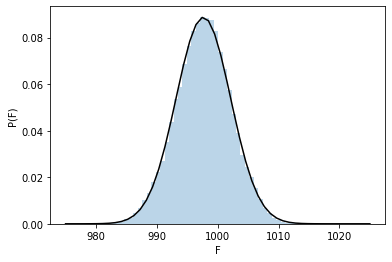

In [ ]:
# Gráficamos el histograma
plt.hist(sample, bins=50, histtype="stepfilled", alpha=0.3, density = True)

# graficamos una gaussiana
F_fit = np.linspace(975, 1025)
pdf = stats.norm(np.mean(sample), np.std(sample)).pdf(F_fit)

plt.plot(F_fit, pdf, '-k')
plt.xlabel("F"); plt.ylabel("P(F)")



In [ ]:
print("""
      F_true = {0}
      F_est  = {1:.0f} +/- {2:.0f} (based on {3} measurements)
      """.format(F_true, np.mean(sample), np.std(sample), N))


      F_true = 1000
      F_est  = 998 +/- 4 (based on 50 measurements)
      


Como nota al margen, es posible que también haya notado un pequeño juego de manos: ¡al final, usamos un enfoque frecuentista para caracterizar nuestras muestras posteriores! Cuando calculamos la media muestral y la desviación estándar anteriores, estábamos empleando una técnica claramente frecuentista para caracterizar la distribución posterior. El resultado bayesiano puro para un problema como este sería informar la distribución posterior en sí (es decir, su muestra representativa) y dejarlo así. Es decir, en el bayesianismo puro la respuesta a una pregunta no es un solo número con barras de error; la respuesta es la distribución posterior sobre los parámetros del modelo.

## Resumen : 
- El frecuentismo considera que las probabilidades están relacionadas con las frecuencias de eventos reales o hipotéticos.
- El bayesianismo considera probabilidades para medir grados de conocimiento.
- Los análisis frecuentistas generalmente proceden mediante el uso de estimaciones puntuales y enfoques de máxima verosimilitud.
- Los análisis bayesianos generalmente calculan el posterior ya sea directamente o mediante alguna versión del muestreo MCMC.

#Cuando los enfoques difieren: Juego de Billar

Uno de los factores que hace que difieran los enfoques, es la presencia de parámetros "molestos". 
<br>
Los parámetros molestos son aquellos que no nos interesa estudiar, pero aún así son vitales para poder estimar algun parámetro de interés.



## Juego del Billar 
Alice y Bob entran en una habitación. Detrás de una cortina hay una mesa de billar, que no pueden ver, pero su amiga Carol sí. Carol hace rodar una pelota por la mesa y marca dónde cae. Una vez que esta marca está en su lugar, Carol comienza a hacer rodar nuevas bolas por la mesa. Si la bola cae a la izquierda de la marca, Alice obtiene un punto; si aterriza a la derecha de la marca, Bob obtiene un punto. Podemos suponer, por ejemplo, que los lanzamientos de Carol son imparciales: es decir, las bolas tienen la misma probabilidad de terminar en cualquier lugar de la mesa. La primera persona en llegar a seis puntos gana el juego. <br>
Aquí la ubicación de la marca (determinada por la primera tirada) puede considerarse un **parámetro molesto** ($\hat{p}$): se desconoce y no es de interés inmediato, pero claramente debe tenerse en cuenta al predecir el resultado de las tiradas posteriores. Si la primera tirada se coloca muy a la derecha, las tiradas posteriores favorecerán a Alice. Si se asienta muy a la izquierda, Bob será el favorito en su lugar.

Pregunta: 
> En un juego en particular, después de ocho tiradas, Alice tiene cinco puntos y Bob tiene tres puntos. ¿Cuál es la probabilidad de que Bob gane el juego?

## Un enfoque Frecuentista

Se puede estimar el parametro molesto $\hat{p}$, según MLE de la distribución binomial para estimar $p$ como :
\begin{equation}
\hat{p} = 5/8
\end{equation}

[MLE Binomial Distribution](https://en.wikipedia.org/wiki/Binomial_distribution#Estimation_of_parameters). <br>

Luego, se puede computar la probabilidad de que bob gane el juego como:
\begin{equation}
P(B) = (1 - \hat{p})^3
\end{equation}


In [ ]:
p_hat = 5. / 8.
freq_prob = (1 - p_hat) ** 3
print("Naïve Frequentist Probability of Bob Winning: {0:.2f}".format(freq_prob))

Naïve Frequentist Probability of Bob Winning: 0.05


## Enfoque Bayesiano
- B : Gana Bob
- D : Data observada $D = (5,3)$
- $p$ : probabilidad de que la bola caiga en el lado de alicia durante el juego.
<br>
En resumen, el enfoque bayesiano lidia con los parámetros molestos marginalizandolos, o sea, sumando su probabilidad conjunta sobre todo su dominio:
<br>
\begin{equation}
P(B~|~D) \equiv \int_{-\infty}^\infty P(B,p~|~D) {\mathrm d}p
\end{equation}

Aplicando la ley de bayes y la definición de probabilidad condicional queda :
\begin{equation}
P(B~|~D) = \frac{\int P(B~|~p,D) P(D~|~p) P(p) dp}{\int P(D~|~p)P(p) dp}
\end{equation}

En donde 
- $P(B~|~p,D) = (1 - p) ^ 3$  -> Likelihood
- $P(D~|~p) \propto p^5 (1-p)^3$ -> Binomial
- $P(p) \propto 1$ -> Prior Plana

Resultando

\begin{equation}
P(B~|~D) = \frac{\int_0^1 (1 - p)^6 p^5 dp}{\int_0^1 (1 - p)^3 p^5 dp}
\end{equation}
Lo cual es un caso especial de la Función Beta:
\begin{equation}
\beta(n, m) = \int_0^1 (1 - p)^{n - 1} p^{m - 1}
\end{equation}

In [ ]:
from scipy.special import beta
bayes_prob = beta(6 + 1, 5 + 1) / beta(3 + 1, 5 + 1)

print("P(B|D) = {0:.2f}".format(bayes_prob))

P(B|D) = 0.09


## Que enfoque es el correcto? : Simulación de Monte Carlo
Para poder descubrir esto, simplemente nos queda simular. Debido a que muchas de las distribuciones involucradas son uniformes, es sencillo poder simular la situación dada. <br>
En resumen, lo que se hace es simular muchos juegos que cumplan las condiciones dadas $D = (5,3)$, y ver en cuantos de ellos Bob gana.


In [ ]:
import numpy as np
np.random.seed(0)

# play 100000 games with randomly-drawn p, between 0 and 1
p = np.random.random(100000)

# each game needs at most 11 rolls for one player to reach 6 wins
rolls = np.random.random((11, len(p)))

# count the cumulative wins for Alice and Bob at each roll
Alice_count = np.cumsum(rolls < p, 0)
Bob_count = np.cumsum(rolls >= p, 0)

# sanity check: total number of wins should equal number of rolls
total_wins = Alice_count + Bob_count
assert np.all(total_wins.T == np.arange(1, 12))
print("(Sanity check passed)")

# determine number of games which meet our criterion of (A wins, B wins)=(5, 3)
# this means Bob's win count at eight rolls must equal 3
good_games = Bob_count[7] == 3
print("Number of suitable games: {0}".format(good_games.sum()))

# truncate our results to consider only these games
Alice_count = Alice_count[:, good_games]
Bob_count = Bob_count[:, good_games]

# determine which of these games Bob won.
# to win, he must reach six wins after 11 rolls.
bob_won = np.sum(Bob_count[10] == 6)
print("Number of these games Bob won: {0}".format(bob_won.sum()))

# compute the probability
mc_prob = bob_won.sum() * 1. / good_games.sum()
print("Monte Carlo Probability of Bob winning: {0:.2f}".format(mc_prob))

(Sanity check passed)
Number of suitable games: 11068
Number of these games Bob won: 979
Monte Carlo Probability of Bob winning: 0.09


Podemos ver que el enfoque Bayesiano logra coincidir con este resultado, pero esto no quiere decir que el enfoque frecuentista sea incorrecto, de hecho se fue un poco injusto, ya que existen métodos frecuentistas que pueden dar un correcto resultado ya que manejan bien los parámetros molestosos (en este caso utilizamos un método nativo frecuentista)

# Referencia:
- http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/ 